# Prediksi Harga Mobil Menggunakan Mechine Learning Dengan Algoritma Linear Regression 

---
---

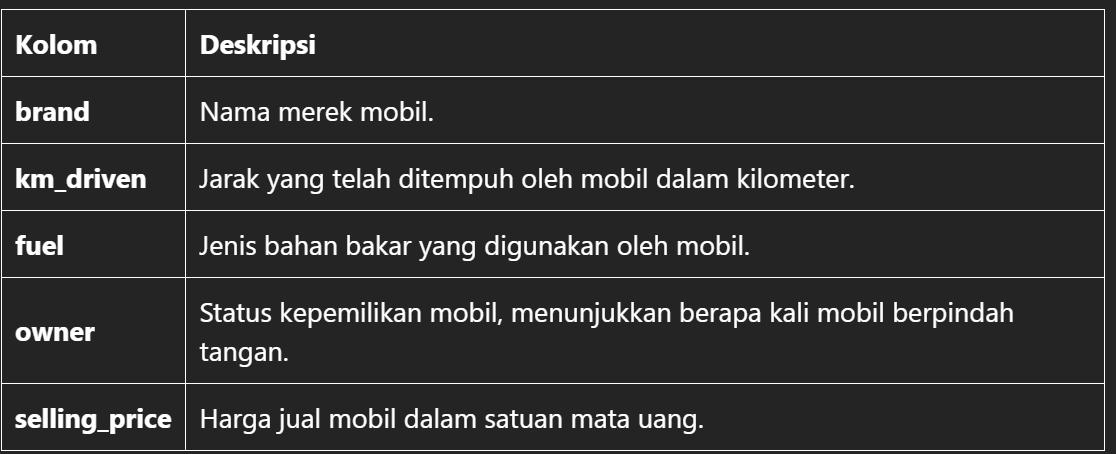

# Data Understanding

In [137]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [138]:
# Read file
data = pd.read_csv("Cars dataset.csv")

In [139]:
# Menampilkan data 
data

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [140]:
# Melihat jumlah baris dan kolom
data.shape

(8128, 5)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


----

----

# Cleanning Data

- Cek Missing Values

In [142]:
data.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

- Cek kolom unik pada data

In [143]:
# Menampilkan kolom yang unik pada data train
for col in data.select_dtypes(include = ['int','object']).columns :
    print(col)
    print(data[col].unique())
    print()

brand
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']

km_driven
[ 145500  120000  140000  127000   45000  175000    5000   90000  169000
   68000  100000   80000   40000   70000   53000   50000   72000   35000
   28000   25000    2388   16200   10000   15000   42000   60000   76000
   28900   86300   23300   32600   10300   77000   99000   27800   49800
  151000   54700   64000   63000  127700   33900   59000  110000  147000
   30000  135000    9850   78000  170000   49000   32000   38000   44000
   12000   55500   61500  150000   37800  114000   48000   69000   13000
   76139   65000    1303   31800   20000   17000   21000   37000   29500
   27000    7500   19000   41000   39000   22000   47000   72200   49900
    9000   11000   95000   18000   46

- cek data duplikat

In [144]:
data.duplicated().sum()

np.int64(1678)

In [145]:
# Menghapus data duplikat tersebut
data = data.drop_duplicates()

In [146]:
data.shape

(6450, 5)

----

----

# Exploratory Data Analysis (EDA)

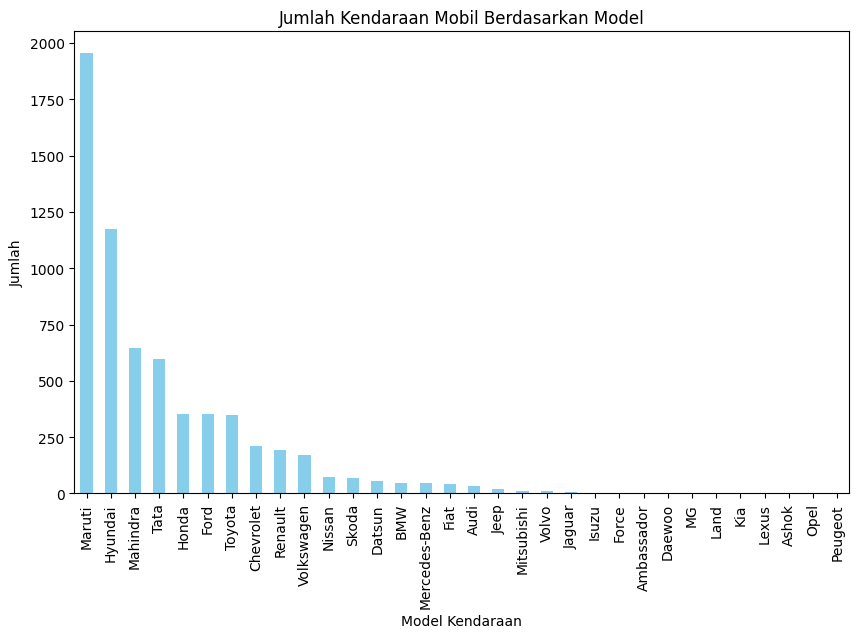

In [147]:
jumlah_kendaraan = data['brand'].value_counts()

plt.figure(figsize=(10,6))
jumlah_kendaraan.plot(kind='bar', color='skyblue')
plt.xlabel("Model Kendaraan")
plt.ylabel("Jumlah")
plt.title("Jumlah Kendaraan Mobil Berdasarkan Model")
plt.show()

- Menampilkan 5 Brand Mobil Yang Paling Tinggi Harga Jualnya

In [148]:
best = data.groupby('brand')['selling_price'].sum().reset_index()
top_3 = best.nlargest(5,'selling_price')
jarak = [0.2,0,0,0,0]
top_3

,brand,selling_price
20,Maruti,759743821
11,Hyundai,530522432
19,Mahindra,401144973
29,Toyota,312527978
28,Tata,210592904


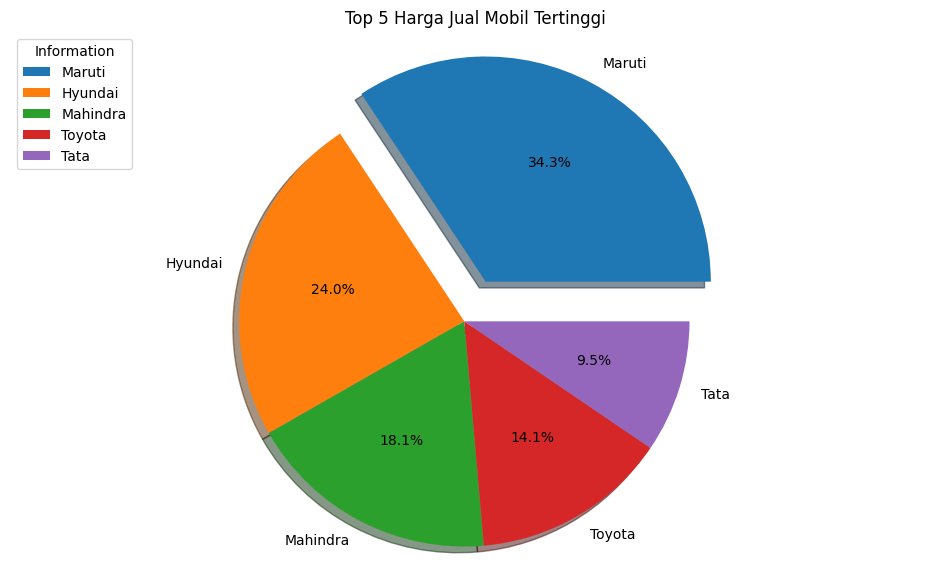

In [149]:
plt.figure(figsize=(12,7))
plt.pie(top_3['selling_price'], labels=top_3['brand'], shadow=True, explode = jarak, autopct="%1.1f%%")
plt.title("Top 5 Harga Jual Mobil Tertinggi")
plt.legend(title = 'Information', loc = "upper left")

plt.axis("equal")
plt.show()

In [150]:
data.columns

Index(['brand', 'km_driven', 'fuel', 'owner', 'selling_price'], dtype='object')

In [151]:
owner_grafik = data['owner'].value_counts()

In [152]:
x = owner_grafik.index
y = owner_grafik.values

In [153]:
x.shape, y.shape

((5,), (5,))

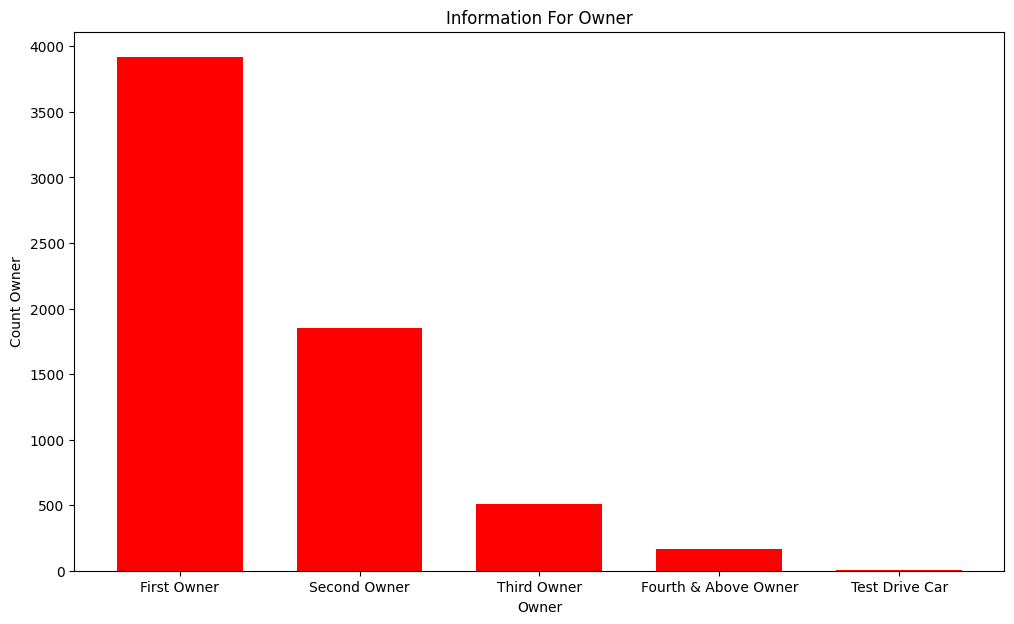

In [154]:
plt.figure(figsize=(12,7))
plt.bar(x,y, color = 'r', width=0.7)
plt.title("Information For Owner")
plt.xlabel("Owner")
plt.ylabel("Count Owner")

plt.show()

- Menampilkan jenis bahan bakar yang digunakan setiap mobil

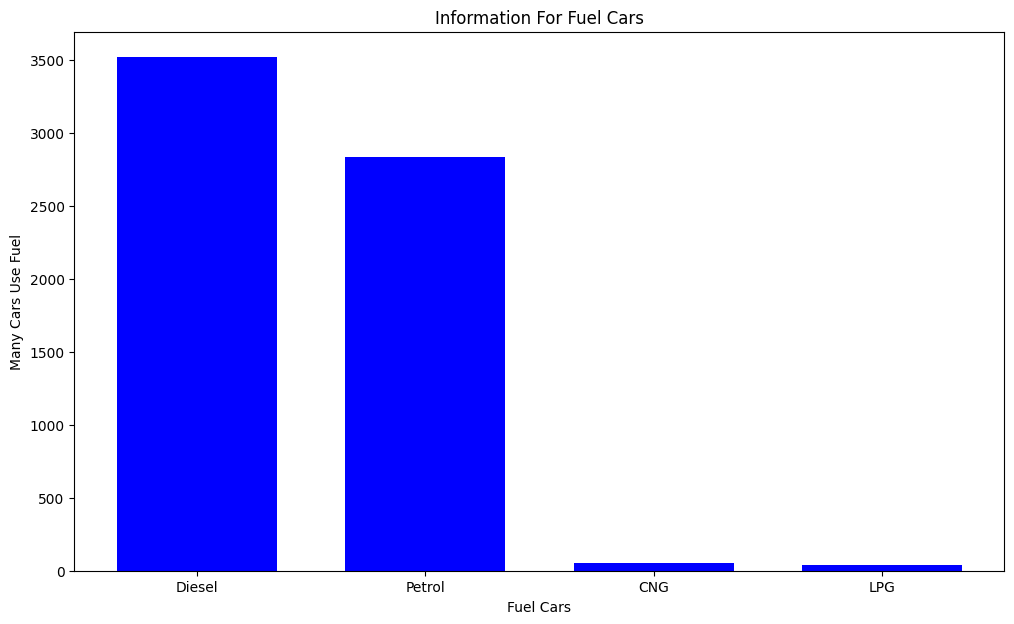

In [155]:
fuel_grafik = data['fuel'].value_counts()

x = fuel_grafik.index
y = fuel_grafik.values


plt.figure(figsize=(12,7))
plt.bar(x,y, color = 'b', width=0.7)
plt.title("Information For Fuel Cars")
plt.xlabel("Fuel Cars")
plt.ylabel("Many Cars Use Fuel")

plt.show()

- Menampilkan 5 Top Kilometer Tertinggi

In [156]:
kilometer_tall = data.groupby('brand')['km_driven'].sum().reset_index()
kilometer_tall

,brand,km_driven
0,Ambassador,330000
1,Ashok,200000
2,Audi,1898731
3,BMW,2338589
4,Chevrolet,16995536
5,Daewoo,243951
6,Datsun,2015186
7,Fiat,3852652
8,Force,300279
9,Ford,26475500


In [157]:
top5 = kilometer_tall.nlargest(5,'km_driven')
top5

,brand,km_driven
20,Maruti,131505610
11,Hyundai,79403610
19,Mahindra,60147105
28,Tata,47886349
29,Toyota,40345993


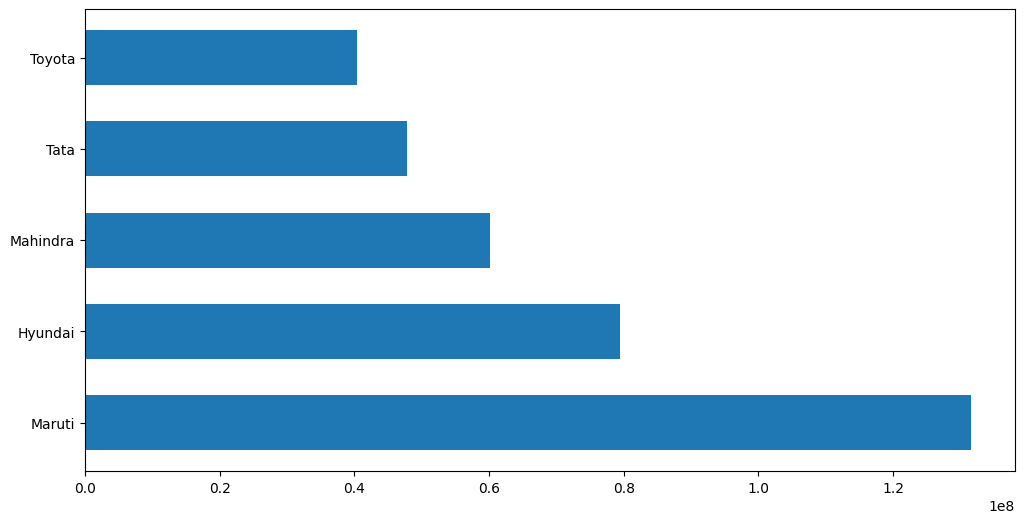

In [158]:
plt.figure(figsize=(12,6))
plt.barh(top5['brand'], top5['km_driven'], height=0.6)
plt.show()

----

----

# Label Encoder

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6450 entries, 0 to 8125
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          6450 non-null   object
 1   km_driven      6450 non-null   int64 
 2   fuel           6450 non-null   object
 3   owner          6450 non-null   object
 4   selling_price  6450 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 302.3+ KB


In [160]:
brand_encoder = LabelEncoder()
fuel_encoder = LabelEncoder()
owner_encoder = LabelEncoder()

In [161]:
data['brand'] = brand_encoder.fit_transform(data['brand'])
data['fuel'] = brand_encoder.fit_transform(data['fuel'])
data['owner'] = brand_encoder.fit_transform(data['owner'])

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_20016\2244460782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['brand'] = brand_encoder.fit_transform(data['brand'])
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_20016\2244460782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel'] = brand_encoder.fit_transform(data['fuel'])
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_20016\2244460782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [162]:
data.sample(10)

,brand,km_driven,fuel,owner,selling_price
477,9,60000,1,2,300000
6368,20,20000,3,0,580000
4028,23,110000,3,0,350000
2123,11,80000,3,2,195000
2805,29,260000,1,4,600000
1263,11,100000,3,1,81000
4671,3,10000,1,0,5200000
5213,4,60000,3,0,140000
175,20,50000,3,2,390000
3852,11,330000,3,2,550000


- Cheking Corelasion

<Axes: >

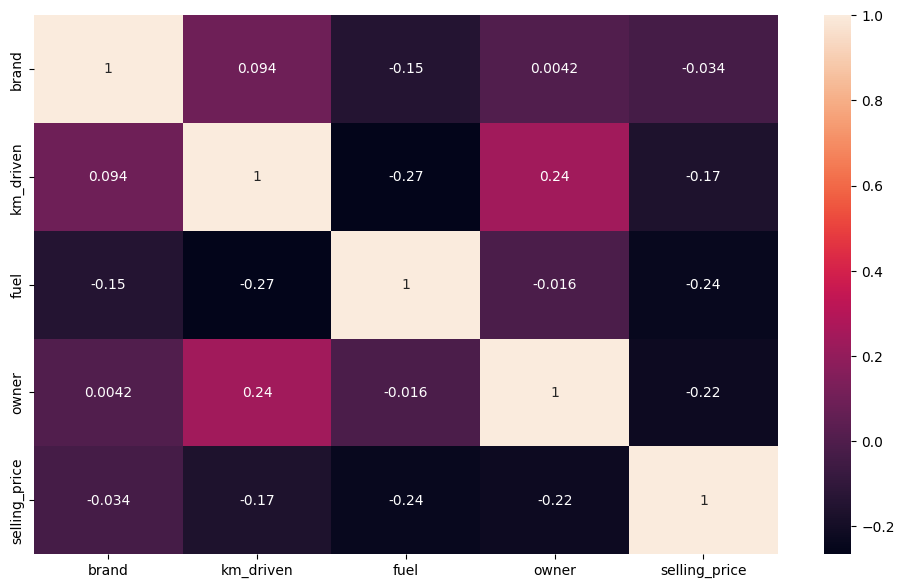

In [163]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True)

----

----

# Preperation Data


In [164]:
# Menhapus kolom selling_price

x = data.drop(['selling_price'], axis = 1)
y = data['selling_price']

In [165]:
x.shape, y.shape

((6450, 4), (6450,))

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=41)

-----

---

# Training dan Evalution Data 

In [167]:
model = LinearRegression()
model.fit(x_train, y_train)
# model.fit(x, y)
prediction = model.predict(x_test)

In [168]:
score = model.score(x_test,y_test)
print(f'Akurasi Model Linear Regression = {score}')

Akurasi Model Linear Regression = 0.1641535373971048


In [169]:
# untuk melihat hasil pelatihan data 
print('MAE : ', metrics.mean_absolute_error(y_test,prediction))
print('MAE : ', metrics.mean_squared_error(y_test,prediction))
print('MAE : ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE :  260974.0643871325
MAE :  269185281646.37036
MAE :  518830.6868780704


---

---

# Testing

In [170]:
data.columns

Index(['brand', 'km_driven', 'fuel', 'owner', 'selling_price'], dtype='object')

In [172]:
input_data = {
    'brand' : 'Hyundai',
    'km_driven' : 180000,
    'fuel' : 'LPG',
    'owner' : 'Second Owner'
}

data_test = pd.DataFrame([input_data])

In [173]:
data_test

,brand,km_driven,fuel,owner
0,Hyundai,180000,LPG,Second Owner


In [174]:
data_test['brand'] = brand_encoder.fit_transform(data_test['brand'])
data_test['fuel'] = brand_encoder.fit_transform(data_test['fuel'])
data_test['owner'] = brand_encoder.fit_transform(data_test['owner'])

In [175]:
data_test

,brand,km_driven,fuel,owner
0,0,180000,0,0


In [176]:
prediciton_ = model.predict(data_test)

prediciton_format = round(prediciton_[0],2)

print(f"Estimasi Harga Mobil - Rp.{prediciton_format:,}")

Estimasi Harga Mobil - Rp.788,622.02
